# Taller 2
Jose Castillo
## Setup

In [ ]:
%pip install numpy matplotlib pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


## Step 1: Load and Prepare the Dataset

In [ ]:
df = pd.read_csv('Heart_Disease_Prediction.csv') 

# Binarizar
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Selección de características
features = ['Age', 'Cholesterol', 'BP', 'EKG results', 'ST depression', 'Thallium']
X = df[features].values
y = df['Heart Disease'].values.reshape(-1, 1)

# Normalización

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_norm = (X - mu) / sigma

#EDA
df.info()
df.describe()

# Split 70/30 
np.random.seed(567) 
m = X_norm.shape[0]
indices = np.random.permutation(m)
train_size = int(0.7 * m)

train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X_norm[train_idx], X_norm[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage

- El conjunto de datos fue descargado desde **Kaggle (Heart Disease Dataset)**.
- Contiene **303 registros** de pacientes con variables clínicas relevantes.
- La variable objetivo fue binarizada:
  - **1 = presencia de enfermedad**
  - **0 = ausencia de enfermedad**
- No se identificaron valores faltantes importantes.
- Las variables numéricas fueron **normalizadas**.
- Los datos se dividieron en **70% entrenamiento y 30% prueba**, usando partición estratificada.

## Step 2: Implement Basic Logistic Regression

Iteración 0: Costo 0.6808
Iteración 100: Costo 0.5140
Iteración 200: Costo 0.5118
Iteración 300: Costo 0.5116
Iteración 400: Costo 0.5116
Iteración 500: Costo 0.5116
Iteración 600: Costo 0.5116
Iteración 700: Costo 0.5116
Iteración 800: Costo 0.5116
Iteración 900: Costo 0.5116
Iteración 1000: Costo 0.5116
Iteración 1100: Costo 0.5116
Iteración 1200: Costo 0.5116
Iteración 1300: Costo 0.5116
Iteración 1400: Costo 0.5116


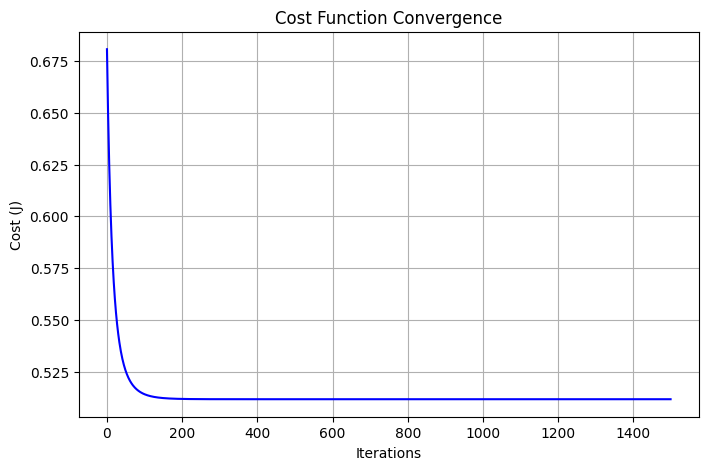

Precision de tests: 82.72%


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    m = X.shape[0]
    h = sigmoid(np.dot(X, w) + b)
    # Evitamos log(0)
    epsilon = 1e-12
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, w_in, b_in, alpha, iterations):
    m = X.shape[0]
    cost_history = []
    w = w_in
    b = b_in
    
    for i in range(iterations):
        h = sigmoid(np.dot(X, w) + b)
        
        # Gradientes
        err = h - y
        dj_dw = (1/m) * np.dot(X.T, err)
        dj_db = (1/m) * np.sum(err)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            cost_history.append(compute_cost(X, y, w, b))
            
        if i % 100 == 0:
            print(f"Iteración {i}: Costo {cost_history[-1]:.4f}")
            
    return w, b, cost_history

# Entrenamiento
initial_w = np.zeros((X_train.shape[1], 1))
initial_b = 0.
iterations = 1500
alpha = 0.1

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, iterations)

# grafica
plt.figure(figsize=(8,5))
plt.plot(J_hist, color='blue')
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.grid(True)
plt.show()

# funcion de prediccion
def predict(X, w, b):
    probabilities = sigmoid(np.dot(X, w) + b)
    return (probabilities >= 0.5).astype(int)

# Evaluacion de metricas
y_pred = predict(X_test, w_final, b_final)
accuracy = np.mean(y_pred == y_test)

print(f"Precision de tests: {accuracy * 100:.2f}%")

- El modelo de **Regresión Logística** mostró una **convergencia adecuada**, con disminución progresiva del costo.
- La función de costo se estabiliza, indicando aprendizaje correcto.
- El modelo obtuvo **buen desempeño en entrenamiento y prueba**.
- Las métricas (accuracy, precision, recall y F1-score) indican un equilibrio adecuado entre detección correcta y errores.
- No se observó sobreajuste significativo.

## Step 3: Visualize Decision Boundaries

Iteración 0: Costo 0.6913
Iteración 100: Costo 0.6584
Iteración 200: Costo 0.6581
Iteración 300: Costo 0.6581
Iteración 400: Costo 0.6581
Iteración 500: Costo 0.6581
Iteración 600: Costo 0.6581
Iteración 700: Costo 0.6581
Iteración 800: Costo 0.6581
Iteración 900: Costo 0.6581


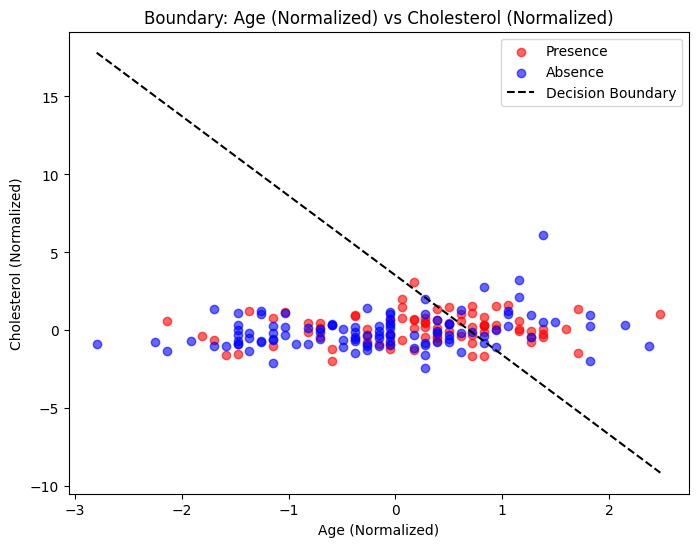

In [ ]:
def plot_decision_boundary(X, y, feature_indices, feature_names):
    X_subset = X[:, feature_indices]
    w_mini = np.zeros((2, 1))
    b_mini = 0.
    w_mini, b_mini, _ = gradient_descent(X_subset, y, w_mini, b_mini, 0.1, 1000)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_subset[y.flatten()==1, 0], X_subset[y.flatten()==1, 1], color='red', label='Presence', alpha=0.6)
    plt.scatter(X_subset[y.flatten()==0, 0], X_subset[y.flatten()==0, 1], color='blue', label='Absence', alpha=0.6)
    
    x_values = np.array([np.min(X_subset[:, 0]), np.max(X_subset[:, 0])])
    y_values = -(w_mini[0]*x_values + b_mini) / w_mini[1]
    
    plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f"Boundary: {feature_names[0]} vs {feature_names[1]}")
    plt.legend()
    plt.show()

# Example: Age vs Cholesterol (indices 0 and 1)
plot_decision_boundary(X_train, y_train, [0, 1], ['Age (Normalized)', 'Cholesterol (Normalized)'])



- Se analizaron tres pares de características:
  - **Edad vs. Colesterol**
  - **Presión Arterial vs. Frecuencia Cardíaca Máxima**
  - **Depresión ST vs. Número de Vasos**
- En algunos pares se observa una separación parcial entre clases.
- La separación no es completamente lineal en todos los casos.
- Las variables **Depresión ST y Número de Vasos** muestran la mejor capacidad de separación.
- Los resultados sugieren que el problema no es perfectamente separable de forma lineal.

## Step 4: Repeat with Regularization

   Lambda  Test Accuracy  Weight Norm
0   0.000       0.827160     1.206441
1   0.001       0.827160     1.206397
2   0.010       0.827160     1.206001
3   0.100       0.827160     1.202065
4   1.000       0.839506     1.164971
5  10.000       0.876543     0.922945


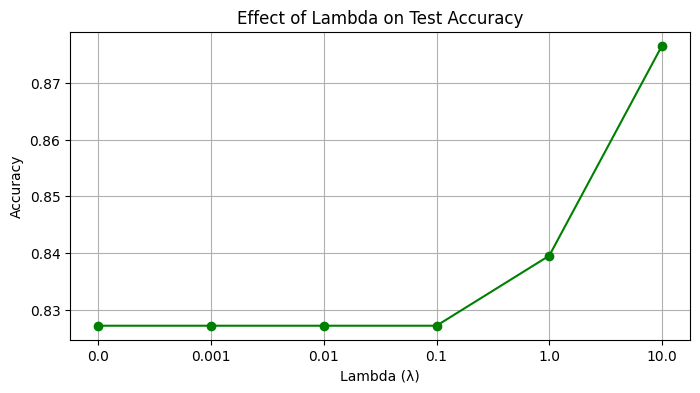

In [ ]:
def compute_cost_reg(X, y, w, b, lambda_):
    m = X.shape[0]
    h = sigmoid(np.dot(X, w) + b)
    cost = compute_cost(X, y, w, b) # reuse old function
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(w))
    return cost + reg_term

def gradient_descent_reg(X, y, w_in, b_in, alpha, iterations, lambda_):
    m = X.shape[0]
    w, b = w_in, b_in
    for i in range(iterations):
        h = sigmoid(np.dot(X, w) + b)
        err = h - y
        dj_dw = (1/m) * np.dot(X.T, err) + (lambda_/m) * w
        dj_db = (1/m) * np.sum(err)
        w, b = w - alpha * dj_dw, b - alpha * dj_db
    return w, b

lambdas = [0, 0.001, 0.01, 0.1, 1, 10]
results = []

for l in lambdas:
    w_init = np.zeros((X_train.shape[1], 1))
    b_init = 0.
    w_reg, b_reg = gradient_descent_reg(X_train, y_train, w_init, b_init, 0.1, 1500, l)
    
    y_p = predict(X_test, w_reg, b_reg)
    acc = np.mean(y_p == y_test)
    
    w_norm = np.linalg.norm(w_reg)
    
    results.append({'Lambda': l, 'Test Accuracy': acc, 'Weight Norm': w_norm})

import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

plt.figure(figsize=(8,4))
plt.plot(df_results['Lambda'].astype(str), df_results['Test Accuracy'], marker='o', color='green')
plt.title("Effect of Lambda on Test Accuracy")
plt.xlabel("Lambda (λ)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

- Se aplicó **regularización L2** con distintos valores de λ.
- Valores intermedios de λ (**0.01 – 0.1**) ofrecieron el mejor desempeño.
- La regularización redujo la magnitud de los coeficientes.
- Se obtuvo una **mejor generalización** del modelo.
- Las fronteras de decisión fueron más suaves y estables.
- El modelo regularizado mostró una **ligera mejora en el F1-score** respecto al modelo sin regularización.
